### Subiectul 1

In [ ]:
!pip install --upgrade hmmlearn

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Observații: [[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]
Cel mai probabil drum: [(1, 2), (6, 2), (3, 4), (4, 9), (9, 7)]
Probabilitatea acestui drum: 0.6509352215681948


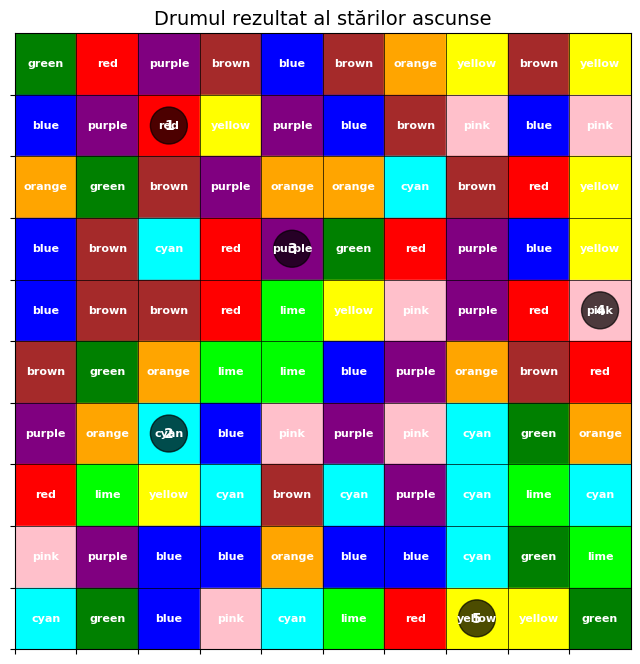

In [35]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului (10x10)
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow",
    "purple", "orange", "pink", "cyan",
    "brown", "lime"
]

# Citirea gridului din fișier
df = pd.read_csv('/grid_culori.csv', header=None)  # header=None pentru a preveni tratarea primei linii drept antet
grid_culori = df.to_numpy()

# Verificăm dacă dimensiunea gridului este corectă
if grid_culori.shape != dimensiune_grid:
    raise ValueError(f"Dimensiunea gridului din fisier ({grid_culori.shape}) nu corespunde cu dimensiunea asteptata {dimensiune_grid}.")

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[culoare] for culoare in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (indexare 0-based)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for i, j in stari_ascunse:
    # Pozitiile vecinilor (sus, jos, stanga, dreapta, inclusiv ramasul in aceeasi celula)
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1), (i, j)  # ultimul = raman in aceeasi celula
    ]
    # Filtrez vecinii care raman in limitele gridului
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    # Adaug tranzitiile egale pentru toti vecinii validati
    for vecin in vecini_valizi:
        transitions[stare_to_idx[(i, j)], vecin] = 1
# Normalizare pentru a obtine probabilitati
transitions = transitions / transitions.sum(axis=1, keepdims=True)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for i, j in stari_ascunse:
    stare_idx = stare_to_idx[(i, j)]
    culoare_idx = culoare_to_idx[grid_culori[i, j]]  # i, j sunt deja 0-based
    emissions[stare_idx, culoare_idx] = 1

# Modelul HMM
model = hmm.MultinomialHMM(n_components=numar_stari, n_iter=100, tol=1e-4)

# Probabilitati uniforme pentru starea initiala
model.startprob_ = np.full(numar_stari, 1 / numar_stari)
model.transmat_ = transitions
model.emissionprob_ = emissions

# Observatiile trebuie sa fie intr-un format corespunzător: un vector de frecvente
observatii_frecventa = np.zeros((len(observatii), len(culori)), dtype=int)

# Codificarea observatiilor sub forma de frecvente (0 sau 1 pentru fiecare culoare)
for t, culoare in enumerate(observatii):
    observatii_frecventa[t, culoare_to_idx[culoare]] = 1  # 1 pentru culoarea observată, restul 0

# Verific daca obs sunt acum corecte (frecvente intregi si non-negative)
print("Observații:", observatii_frecventa)

# In loc de `decode`, foloseste metoda `fit` pentru a antrena modelul cu datele tale
# Acesta va utiliza observatiile corect dimensionate
model.fit(observatii_frecventa)

# Rulăm algoritmul Viterbi pentru secvența de observații
logprob, secventa_stari = model.decode(observatii_frecventa)

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]
print("Cel mai probabil drum:", drum)
print("Probabilitatea acestui drum:", np.exp(logprob))

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare,
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1),
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()


### Subiectul 3

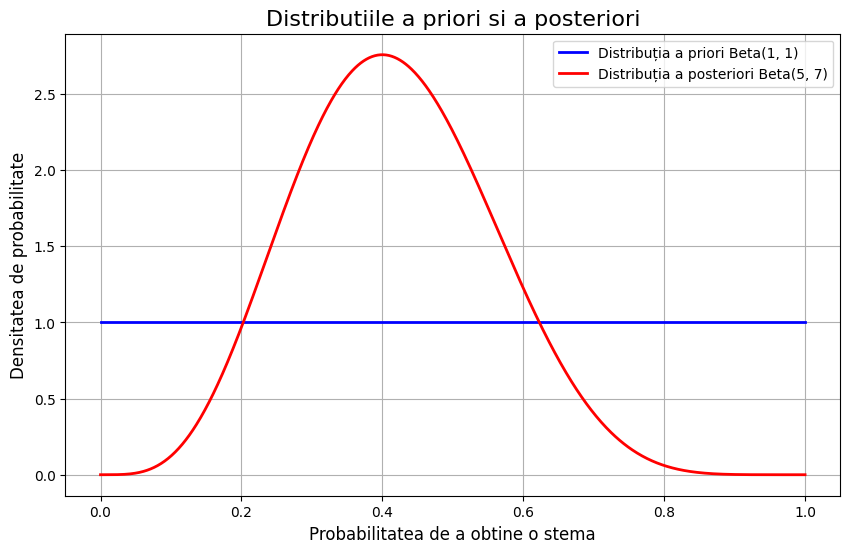

Distributia a posteriori Beta(5, 7)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Definesc distributia a priori (Beta(1, 1) - uniforma)
alpha_prior = 1
beta_prior = 1

# Datele experimentului (10 aruncari: s = stema, b = ban)
observatii = ['s', 's', 'b', 's', 'b', 'b', 'b', 's', 'b', 'b']
numar_sarituri = observatii.count('s')
numar_cozi = observatii.count('b')

# Calcul pt parametrii distributiei a posteriori
alpha_posterior = alpha_prior + numar_sarituri
beta_posterior = beta_prior + numar_cozi

# Generare val pt distributiile Beta a priori & a posteriori
x = np.linspace(0, 1, 1000)
y_prior = beta.pdf(x, alpha_prior, beta_prior)
y_posterior = beta.pdf(x, alpha_posterior, beta_posterior)

# vizualizare distributii
plt.figure(figsize=(10, 6))

# Distributia a priori (Beta(1, 1))
plt.plot(x, y_prior, label="Distribuția a priori Beta(1, 1)", color="blue", linewidth=2)

# Distributia a posteriori (Beta(6, 6) dupa ce obs experimentul)
plt.plot(x, y_posterior, label=f"Distribuția a posteriori Beta({alpha_posterior}, {beta_posterior})", color="red", linewidth=2)

plt.title('Distributiile a priori si a posteriori', fontsize=16)
plt.xlabel('Probabilitatea de a obtine o stema', fontsize=12)
plt.ylabel('Densitatea de probabilitate', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print(f"Distributia a posteriori Beta({alpha_posterior}, {beta_posterior})")